<a href="https://colab.research.google.com/github/pahwa1902/LearMachineLearning/blob/master/ReccomendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

'Colab Notebooks'
'Intro to Probability and Stochastic Processes by Dharmaraja.pdf'
 jkt.gslides
 ml-25m
 ppt5.ppt
 shobhitandchandrakant.pptx
 specs.csv
 Stocks
 test.csv
 train.csv
 train_labels.csv
'Untitled presentation.gslides'
 Week4-KNN.gslides


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
import tensorflow as tf
tf.random.set_random_seed(1)
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [0]:
data_movie = pd.read_csv('/content/drive/My Drive/ml-25m/movies.csv')
data_tags = pd.read_csv('/content/drive/My Drive/ml-25m/tags.csv')
data_ratings = pd.read_csv('/content/drive/My Drive/ml-25m/ratings.csv')
data_relevance = pd.read_csv('/content/drive/My Drive/ml-25m/genome-scores.csv')
data_genometags = pd.read_csv('/content/drive/My Drive/ml-25m/genome-tags.csv')

In [0]:
data_ratings.head()
userID=data_ratings['userId']
movieId = data_ratings['movieId']
rating = data_ratings['rating']
timestamp = data_ratings['timestamp']

In [0]:
ratings = pd.DataFrame(data_ratings)

In [0]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [0]:
rating_data = ratings.groupby(['userId','movieId'])

In [0]:
tag_score = pd.DataFrame(data_relevance)
tag_name = pd.DataFrame(data_genometags)

In [0]:
tag_zombie = tag_score[tag_score['tagId']==1127]
tag_zombies = tag_score[tag_score['tagId']==1128]

In [10]:
cosine_similarity(tag_zombie['relevance'].values.reshape(-1,1),tag_zombies['relevance'].values.reshape(-1,1))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [0]:
cosine(tag_zombie['relevance'],tag_zombies['relevance'])

0.2472907852253996

In [0]:
mean_absolute_error(tag_zombies['relevance'],tag_zombie['relevance'])

0.09467340402431963

In [0]:
tag_witch = tag_score[tag_score['tagId']==1112]
tag_witches = tag_score[tag_score['tagId']==1113]

In [0]:
cosine_similarity(tag_witch['relevance'].values.reshape(-1,1),tag_witches['relevance'].values.reshape(-1,1))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [0]:
cosine(tag_witch['relevance'],tag_witches['relevance'])

0.10955769971873042

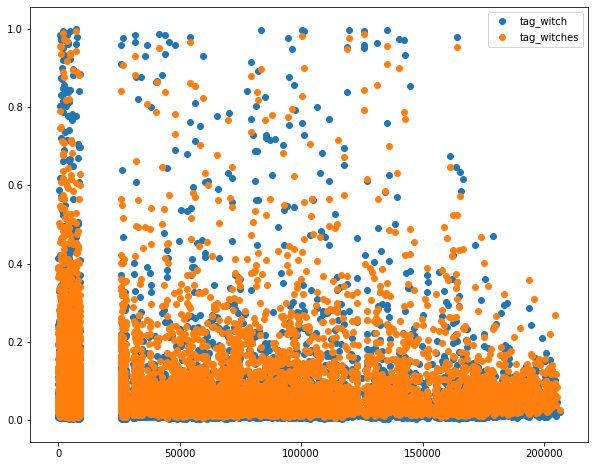

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(tag_witch['movieId'],tag_witch['relevance'],label='tag_witch')
plt.scatter(tag_witches['movieId'],tag_witches['relevance'],label='tag_witches')
plt.legend()

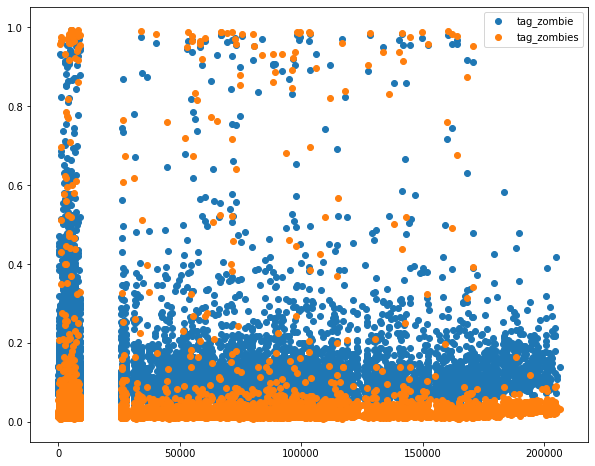

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(tag_zombie['movieId'],tag_zombie['relevance'],label='tag_zombie')
plt.scatter(tag_zombies['movieId'],tag_zombies['relevance'],label='tag_zombies')
plt.legend()

In [0]:
tag_warewolf = tag_score[tag_score['tagId']==1105]
tag_warewolfes = tag_score[tag_score['tagId']==1106]

In [0]:
cosine(tag_warewolf['relevance'],tag_warewolfes['relevance'])

0.180462020407413

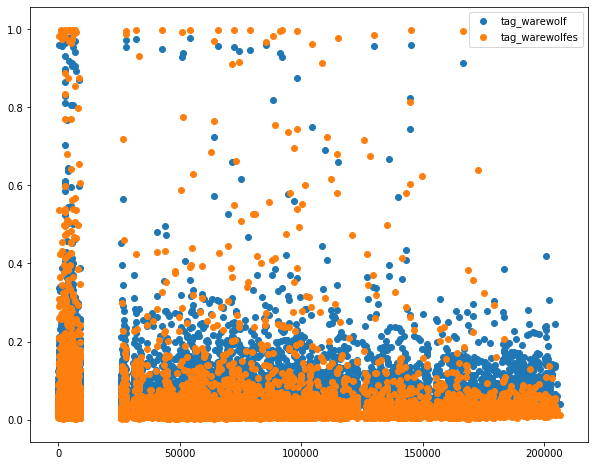

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(tag_warewolf['movieId'],tag_warewolf['relevance'],label='tag_warewolf')
plt.scatter(tag_warewolfes['movieId'],tag_warewolfes['relevance'],label='tag_warewolfes')
plt.legend()

In [0]:
tag_war = tag_score[tag_score['tagId']==1096]
tag_war_movie = tag_score[tag_score['tagId']==1097]
tag_wartime = tag_score[tag_score['tagId']==1098]

In [0]:
cosine(tag_war['relevance'],tag_war_movie['relevance'])

0.08605623814910579

In [0]:
cosine(tag_war_movie['relevance'],tag_wartime['relevance'])

0.22405239883171701

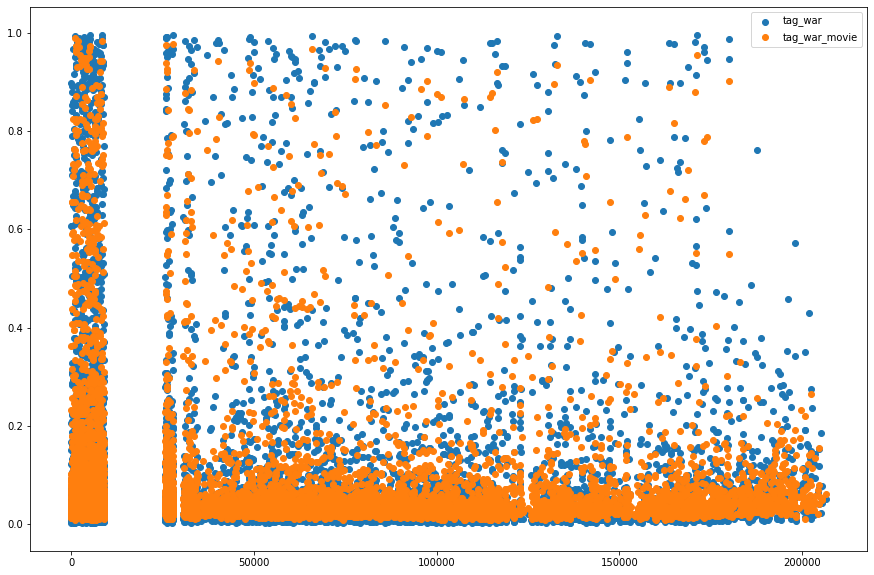

In [0]:
plt.figure(figsize=(15,10))
plt.scatter(tag_war['movieId'],tag_war['relevance'],label='tag_war')
plt.scatter(tag_war_movie['movieId'],tag_war_movie['relevance'],label='tag_war_movie')
#plt.scatter(tag_wartime['movieId'],tag_wartime['relevance'],label='tag_wartime')
plt.legend()

In [0]:
s = str(tag_name[tag_name['tagId']==12]['tag'])
print(s)

11    70mm
Name: tag, dtype: object


In [0]:
cosine_score = []
for i in range(len(tag_name)-5):
  for j in range(i+1,i+5):
    t1 = tag_score[tag_score['tagId']==i+1]
    t2 = tag_score[tag_score['tagId']==j+1]
  
    result = cosine(t1['relevance'],t2['relevance'])
    cosine_score.append([result,i+1,j+1,cosine(t1['movieId'],t2['movieId'])])

In [0]:
def best(n):
  best_result = []
  for i in range(len(cosine_score)):
    if(cosine_score[i][0]<n):
      best_result.append(cosine_score[i])
      
  return best_result

In [50]:
print(best(0.2))

[[0.16958406635942125, 1, 2, 0.0], [0.15058452442155068, 9, 13, 0.0], [0.06059182698627874, 19, 20, 0.0], [0.07682998655425544, 21, 22, 0.0], [0.11981620465276632, 43, 44, 0.0], [0.05471501677945334, 43, 45, 0.0], [0.10365220632305583, 44, 45, 0.0], [0.19919218697987218, 49, 51, 0.0], [0.13334870315315006, 61, 62, 0.0], [0.06586688440988797, 63, 64, 0.0], [0.13364155477927164, 75, 78, 0.0], [0.10328930507295297, 75, 79, 0.0], [0.16209304305535677, 78, 79, 0.0], [0.1301983372052029, 81, 82, 0.0], [0.07990174031767827, 81, 83, 0.0], [0.14252547850156871, 82, 83, 0.0], [0.13799730930907939, 95, 96, 0.0], [0.1589655734753883, 95, 97, 0.0], [0.14687919973021057, 96, 97, 0.0], [0.12398930167525546, 96, 100, 0.0], [0.1764304706621368, 97, 98, 0.0], [0.12074101181452257, 97, 100, 0.0], [0.15867205001364992, 98, 100, 0.0], [0.1661974099961192, 120, 121, 0.0], [0.08888057124890258, 120, 122, 0.0], [0.11418617394979114, 121, 122, 0.0], [0.19769747604277788, 129, 132, 0.0], [0.09809997624265754, 1

In [0]:
len(tag_name)

1128

In [0]:
excluding_results=[]
tag_results=[]
for i in best(0.2):
  excluding_results.append((tag_name.index[tag_name['tagId']==i[2]].values)[0])
  tag_results.append((tag_score.index[tag_score['tagId']==i[2]].tolist()))

In [0]:
tagg=[]
for i in tag_results:
  tagg+=i

In [0]:
tag_name.drop(excluding_results,inplace=True)
tag_score.drop(tagg,inplace=True)

In [0]:
columns = []
for i in tag_name['tag']:
  columns.append(i)

In [40]:
corr_data = pd.DataFrame(columns=columns)
tag_score[tag_score['movieId']==1]['relevance'][0]
len(columns)

1128

In [0]:
corr_data=[]

In [0]:
def corr_tag(a):
  
  dict_tag = {columns[j]:a['relevance'].iloc[j] for j in range(len(a))}
  corr_data.append(dict_tag)
  

In [42]:
tag_score_groupby = tag_score.groupby(['movieId'])
tag_score_groupby.apply(lambda x : corr_tag(x))

""


In [0]:
corr_data_df = pd.DataFrame(corr_data)

In [0]:
corr = corr_data_df.corr()


In [64]:
corr.loc['earnest'].sort_values()

boring                   -0.513371
bad plot                 -0.415501
pointless                -0.391939
predictable              -0.390950
so bad it's funny        -0.382115
                            ...   
idealism                  0.689371
oscar                     0.722978
oscar winner              0.744091
oscar (best directing)    0.775470
earnest                   1.000000
Name: earnest, Length: 1128, dtype: float64

In [0]:
tags_data = pd.DataFrame(data_tags)

In [0]:

dict_model={}

In [0]:
for i in ratings['userId']:
  ratings_data = ratings[ratings['userId']==i]['rating']
  movies_data = ratings[ratings['userId']==i]['movieId']
  n=0
  data_relevance=[]
  for j in movies_data:
    
    m=0
    dict_tags={}
    for k in tag_score[tag_score['movieId']==j]['relevance']:
      dict_tags[columns[m]]=k
      
      m+=1

    data_relevance.append(dict_tags)
    #data_relevance.append(ratings[ratings['movieId']==j]['timestamp'])
  data=pd.DataFrame(data_relevance)
  
  dataset = tf.data.Dataset.from_tensor_slices((data.values,ratings_data.values))
  dataset.shuffle(len(data)).batch(32)
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(32,activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(optimizer=optimizer,loss='mse',metrics=['mse','mae'])
  model.fit(dataset,epochs=10)
  dict_model[i]=tf.trainable_variables('kernel')

In [18]:
print(dict_model)

{1: []}


In [0]:
dict_reg={}

In [0]:
for i in ratings['userId'].iloc[:10]:
  
  ratings_data = ratings[ratings['userId']==i]
  movies_data = ratings[ratings['userId']==i]['movieId']
  n=0
  data_relevance=[]
  rat=[]
  for j in movies_data:
    
    m=0
    dict_tags={}
    if(j in tag_score.values):
      for k in tag_score[tag_score['movieId']==j]['relevance']:
      
        dict_tags[columns[m]]=k
      
        m+=1
    
      data_relevance.append(dict_tags)
    else:
      rat.append((ratings_data.index[ratings_data['movieId']==j].values)[0])
      #ratings_data.drop((ratings_data.index[ratings_data['movieId']==j].values)[0])
    #data_relevance.append(ratings[ratings['movieId']==j]['timestamp'])
  data=pd.DataFrame(data_relevance)
  ratings_data.drop(rat,inplace=True)
  
  linear_regressor = LinearRegression()
  linear_regressor.fit(data,ratings_data['rating'])
  dict_reg[i]=linear_regressor.coef_

In [0]:
print(dict_reg)